1. Постройте график зависимости весов всех признаков от lambda в L2-регуляризации (на данных из урока).

2. Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

3. *Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации.

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# К признаку стажа добавим новые признаки
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],  # стаж
              [500, 700, 750, 600, 1450,        # средняя стоимость занятия
               800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 1, 3, 3, 1, 2]])  # квалификация репетитора
               
y = [45, 55, 50, 59, 65, 35, 75, 80, 50, 60]

X_st = X.copy().astype(np.float64)

X_st[1] = (X[1] - X[1].mean()) / X[1].std()
def calc_std_feat(x):
    res = (x - x.mean()) / x.std()
    return res

X_st[2] = calc_std_feat(X[2])
X_st[3] = calc_std_feat(X[3])

def calc_mse(y, y_pred):
    return np.mean((y - y_pred)**2)

def eval_model_reg2(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations + 1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + 2 * lambda_ * W)

    return W

lambda__ = [1e-1, 5e-2, 1e-3, 5e-4, 1e-5, 5e-6, 1e-7, 5e-8]
weight = []

for itm in lambda__:
    weight.append(eval_model_reg2(X_st, y, iterations=1000, lambda_=itm))
    
weight = np.array(weight).T
weight

array([[10.70455453, 10.75832488, 10.81137546, 10.81191862, 10.81245095,
        10.81245638, 10.8124617 , 10.81246176],
       [ 1.28207988,  1.28573975,  1.28933488,  1.28937161,  1.2894076 ,
         1.28940797,  1.28940833,  1.28940833],
       [ 1.9592094 ,  1.97002174,  1.9806971 ,  1.98080644,  1.9809136 ,
         1.98091469,  1.98091576,  1.98091577],
       [ 2.81032046,  2.82962814,  2.84871146,  2.84890702,  2.84909868,
         2.84910064,  2.84910255,  2.84910257]])

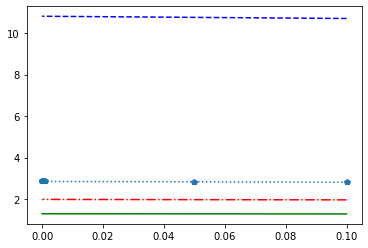

In [19]:
plt.plot(lambda__,weight[0],'b--',lambda__,weight[1],'g',lambda__,weight[2],'r-.', lambda__,weight[3],'p:')
plt.show()

In [22]:
X_norm = X.copy()
X_norm = X_norm.astype(np.float64)
X_norm

array([[1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 3.00e+00, 0.00e+00,
        5.00e+00, 1.00e+01, 1.00e+00, 2.00e+00],
       [5.00e+02, 7.00e+02, 7.50e+02, 6.00e+02, 1.45e+03, 8.00e+02,
        1.50e+03, 2.00e+03, 4.50e+02, 1.00e+03],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        3.00e+00, 3.00e+00, 1.00e+00, 2.00e+00]])

In [24]:
X_norm[1] = (X[1] - X[1].min()) / (X[1].max() - X[1].min())
X_norm[2] = (X[2] - X[2].min()) / (X[2].max() - X[2].min())
X_norm[3] = (X[3] - X[3].min()) / (X[3].max() - X[3].min())

X_norm_st = X_norm.copy()

X_norm_st[1] = calc_std_feat(X_norm[1])
X_norm_st[2] = calc_std_feat(X_norm[2])
X_norm_st[3] = calc_std_feat(X_norm[3])

X_norm_st

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [-0.57142857, -0.57142857, -0.21428571, -0.57142857,  0.14285714,
        -0.92857143,  0.85714286,  2.64285714, -0.57142857, -0.21428571],
       [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735],
       [-0.89625816, -0.89625816,  0.38411064, -0.89625816,  0.38411064,
        -0.89625816,  1.66447944,  1.66447944, -0.89625816,  0.38411064]])

In [28]:
X_st

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [-0.57142857, -0.57142857, -0.21428571, -0.57142857,  0.14285714,
        -0.92857143,  0.85714286,  2.64285714, -0.57142857, -0.21428571],
       [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735],
       [-0.89625816, -0.89625816,  0.38411064, -0.89625816,  0.38411064,
        -0.89625816,  1.66447944,  1.66447944, -0.89625816,  0.38411064]])

In [26]:
X_st_norm = X_st.copy()

X_st_norm[1] = (X_st[1] - X_st[1].min()) / (X_st[1].max() - X_st[1].min())
X_st_norm[2] = (X_st[2] - X_st[2].min()) / (X_st[2].max() - X_st[2].min())
X_st_norm[3] = (X_st[3] - X_st[3].min()) / (X_st[3].max() - X_st[3].min())

X_st_norm

array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ],
       [0.1       , 0.1       , 0.2       , 0.1       , 0.3       ,
        0.        , 0.5       , 1.        , 0.1       , 0.2       ],
       [0.03225806, 0.16129032, 0.19354839, 0.09677419, 0.64516129,
        0.22580645, 0.67741935, 1.        , 0.        , 0.35483871],
       [0.        , 0.        , 0.5       , 0.        , 0.5       ,
        0.        , 1.        , 1.        , 0.        , 0.5       ]])

In [27]:
X_norm

array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ],
       [0.1       , 0.1       , 0.2       , 0.1       , 0.3       ,
        0.        , 0.5       , 1.        , 0.1       , 0.2       ],
       [0.03225806, 0.16129032, 0.19354839, 0.09677419, 0.64516129,
        0.22580645, 0.67741935, 1.        , 0.        , 0.35483871],
       [0.        , 0.        , 0.5       , 0.        , 0.5       ,
        0.        , 1.        , 1.        , 0.        , 0.5       ]])

***Вывод:*** применить можно, но это не имеет смысла. В зависимости от набора данных нужно выбрать тот способ, который поможет модели лучше выполнять свою функцию. При одновременном использовании и того, и другого способа, результат сводится к последнему из них.

In [33]:
def eval_model_reg2(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations + 1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * W/np.abs(W)) 
        if i % 1000 == 0:
            print(i, W, err)
    return W

eval_model_reg2(X_st, y, iterations=10000)

1000 [10.81246181  1.28940834  1.98091578  2.84910259] 2240.8099789073867
2000 [19.25811272  2.13754098  2.73012099  3.60066258] 1505.990295174807
3000 [26.17268854  2.65196748  3.14397314  4.02242544] 1019.8422091472063
4000 [31.83375117  2.97398211  3.36537559  4.25501519] 696.0808255371221
5000 [36.46854453  3.18480086  3.47644925  4.37923578] 479.7477994396544
6000 [40.26311648  3.33111293  3.52438404  4.44151347] 334.9553584242086
7000 [43.3697871   3.43976492  3.53629543  4.46851832] 237.96204598316172
8000 [45.91326299  3.52619971  3.52776233  4.47556705] 172.9577642750018
9000 [47.99564327  3.59930618  3.5077338   4.47145199] 129.37931864082273
10000 [49.70051794  3.66420639  3.4813488   4.46121631] 100.15754767312055


array([49.70051794,  3.66420639,  3.4813488 ,  4.46121631])